In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import tensorflow as tf

from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [ ]:
train_dir='/content/drive/MyDrive/Sweet Lime/Output/train'
test_dir='/content/drive/MyDrive/Sweet Lime/Output/test'
val_dir='/content/drive/MyDrive/Sweet Lime/Output/val'

In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
val_samples=get_files(val_dir)
print(num_classes,"Classes")
print(train_samples,"train_dir")
print(test_samples,"test_dir")
print(val_samples,"val_dir")

In [ ]:
train_datagen= ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)


In [ ]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
val_generator=test_datagen.flow_from_directory(val_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

In [ ]:
from keras.engine.sequential import input_layer
model = Sequential()

model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))

model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
len(model.layers)

11

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


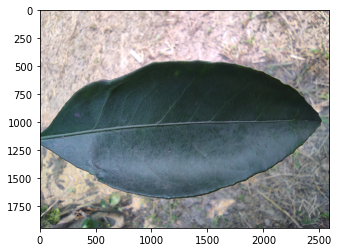

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Sweet Lime/Output/train/Healthy/h103.jpg')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Sweet Lime/Output/train/Healthy/h103.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [ ]:
from keras.models import Model
from keras.models import Sequential

conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
#conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
#max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
#flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
#conv2d_3_features = conv2d_3_output.predict(img)
#max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
#flatten_1_features = flatten_1_output.predict(img)


1/1 [==============================] - 0s 43ms/step


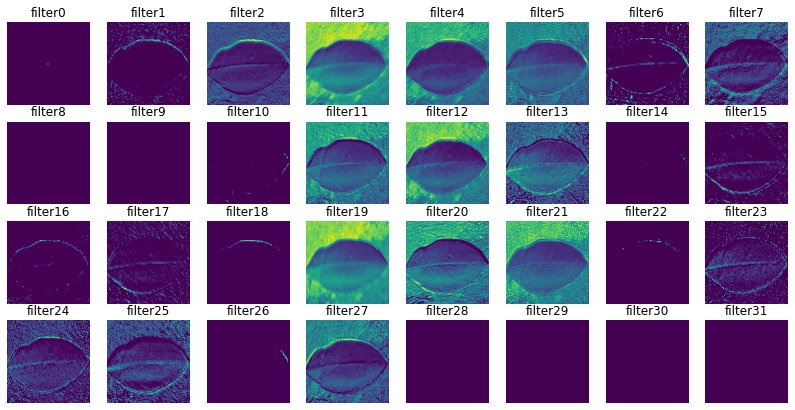

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

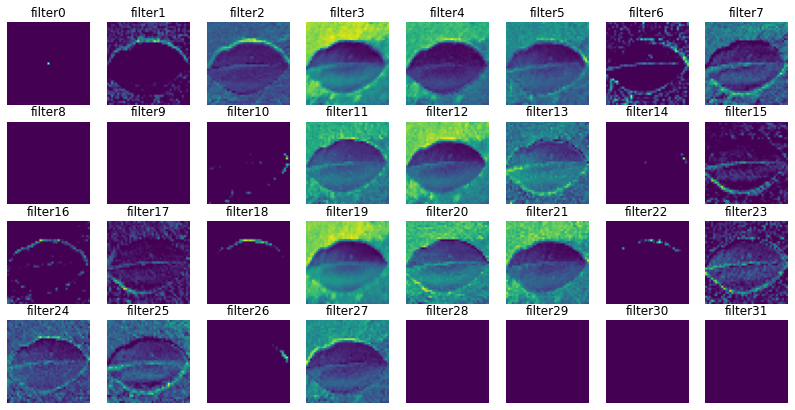

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

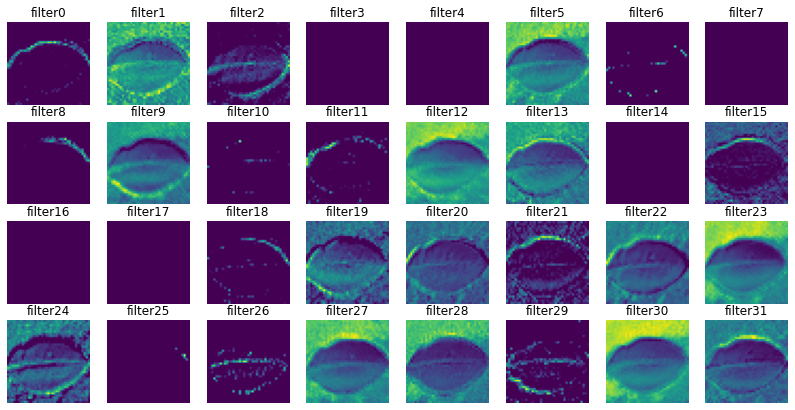

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

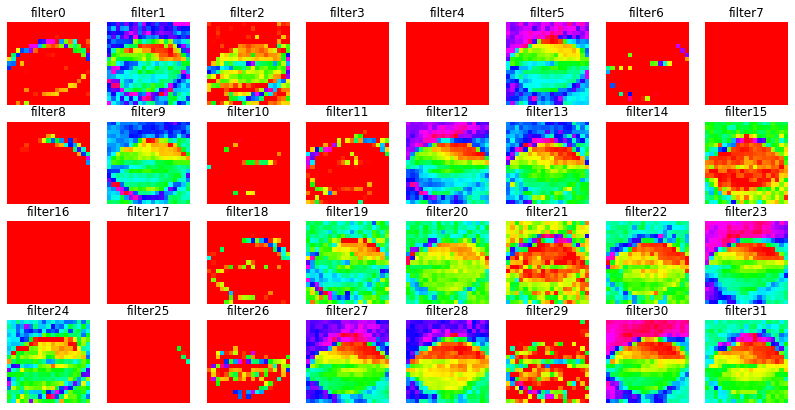

In [ ]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='hsv')
plt.show()

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size)


Found 840 images belonging to 4 classes.


In [ ]:
from keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, batch_size=128, epochs=10)

Epoch 1/10
27/27 [==============================] - 602s 22s/step - loss: 1.3250 - accuracy: 0.3655
Epoch 2/10
27/27 [==============================] - 119s 4s/step - loss: 0.7975 - accuracy: 0.7036
Epoch 3/10
27/27 [==============================] - 117s 4s/step - loss: 0.5311 - accuracy: 0.8262
Epoch 4/10
27/27 [==============================] - 117s 4s/step - loss: 0.4357 - accuracy: 0.8393
Epoch 5/10
27/27 [==============================] - 118s 4s/step - loss: 0.2978 - accuracy: 0.9083
Epoch 6/10
27/27 [==============================] - 117s 4s/step - loss: 0.2488 - accuracy: 0.9012
Epoch 7/10
27/27 [==============================] - 118s 4s/step - loss: 0.1801 - accuracy: 0.9429
Epoch 8/10
27/27 [==============================] - 116s 4s/step - loss: 0.1416 - accuracy: 0.9429
Epoch 9/10
27/27 [==============================] - 117s 4s/step - loss: 0.0460 - accuracy: 0.9881
Epoch 10/10
27/27 [==============================] - 116s 4s/step - loss: 0.0310 - accuracy: 0.9905


In [ ]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
val_generator=test_datagen.flow_from_directory(val_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
print(history.history)

{'loss': [1.3250313997268677, 0.7975404858589172, 0.5310572385787964, 0.43567436933517456, 0.297806978225708, 0.2487991452217102, 0.18011358380317688, 0.1416163295507431, 0.04601870849728584, 0.03102191351354122], 'accuracy': [0.36547619104385376, 0.7035714387893677, 0.8261904716491699, 0.8392857313156128, 0.9083333611488342, 0.901190459728241, 0.9428571462631226, 0.9428571462631226, 0.988095223903656, 0.9904761910438538]}


In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
#plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
#plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

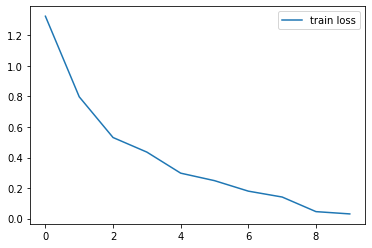

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot training loss
plt.plot(history.history['loss'], label='train loss')
#plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



In [ ]:
print(confusion_matrix(y_pred,test_y))

[[ 6  8  5  6]
 [ 8  8  8  9]
 [ 8  8 10  5]
 [ 8  6  7 10]]


In [ ]:
from keras.callbacks import History
#history = History()

# acc = train.history['accuracy']
# val_acc = train.history['val_accuracy']
# loss = train.history['loss']
# val_loss = train.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_mod_CNN.h5')

In [ ]:
test_dir

'/content/drive/MyDrive/Sweet Lime/Output/test'

In [ ]:
path = '/content/drive/MyDrive/Sweet Lime/Output/test/'

In [ ]:
test_data = []
ids = []
import os

for img in os.listdir(path):
  ids.append(img.split('.')[0])
  test_data.append(path+img)


In [ ]:
import pandas as pd
test_df = pd.DataFrame({'path':test_data})

In [ ]:
test_df.head()

,path
0,/content/drive/MyDrive/Sweet Lime/Output/test/...
1,/content/drive/MyDrive/Sweet Lime/Output/test/...
2,/content/drive/MyDrive/Sweet Lime/Output/test/...
3,/content/drive/MyDrive/Sweet Lime/Output/test/...


In [ ]:
y_pred=model.predict(test_generator)

4/4 [==============================] - 80s 25s/step


In [ ]:
y_pred

array([[7.49430740e-08, 5.47858065e-07, 1.80421125e-07, 9.99999166e-01],
       [6.91087010e-09, 1.51401707e-06, 3.19363730e-10, 9.99998450e-01],
       [1.52473096e-02, 8.94099057e-01, 2.18754052e-03, 8.84661227e-02],
       [1.43860903e-04, 8.72463221e-04, 9.98940885e-01, 4.26942897e-05],
       [4.99176167e-05, 4.97979590e-06, 9.99839306e-01, 1.05674793e-04],
       [2.99201011e-11, 1.00000000e+00, 7.08271608e-10, 2.07569850e-10],
       [7.76438043e-04, 9.99104440e-01, 1.16428557e-04, 2.69699262e-06],
       [6.04856323e-05, 2.41199695e-03, 9.97509718e-01, 1.78950759e-05],
       [9.99892950e-01, 2.36583332e-06, 1.04691178e-04, 1.76866362e-08],
       [2.26584484e-06, 7.43131459e-05, 3.08002855e-05, 9.99892712e-01],
       [5.31774422e-04, 2.01781833e-04, 9.99256670e-01, 9.77800300e-06],
       [8.97028029e-01, 1.49368709e-02, 5.28951995e-02, 3.51398736e-02],
       [4.68844652e-01, 2.30020121e-01, 2.77772576e-01, 2.33626217e-02],
       [5.61493915e-03, 9.66066897e-01, 1.26797166e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 3, 1, 2, 2, 1, 1, 2, 0, 3, 2, 0, 0, 1, 3, 1, 3, 3, 2, 2, 2, 3,
       2, 0, 0, 1, 1, 3, 0, 1, 2, 3, 1, 2, 3, 3, 0, 3, 1, 0, 2, 2, 0, 1,
       1, 1, 0, 0, 0, 2, 3, 2, 2, 1, 2, 0, 3, 0, 1, 1, 2, 1, 3, 2, 2, 3,
       3, 3, 2, 3, 0, 2, 0, 1, 3, 3, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2,
       2, 1, 0, 3, 3, 1, 1, 2, 2, 3, 1, 3, 3, 2, 3, 0, 3, 1, 0, 1, 0, 0,
       3, 0, 2, 1, 1, 2, 1, 3, 3, 1])

In [ ]:
test_y=test_generator.classes

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.20      0.24      0.22        25
           1       0.27      0.24      0.25        33
           2       0.33      0.32      0.33        31
           3       0.33      0.32      0.33        31

    accuracy                           0.28       120
   macro avg       0.28      0.28      0.28       120
weighted avg       0.29      0.28      0.28       120



In [ ]:
a=b=c=d=0
for i in y_pred:
  if i==0:
    a=a+1
  if i==1:
    b=b+1
  if i==2:
    c+=1
  if i==3:
    d+=1
print (a," ",b," ",c," ",d)

In [ ]:
len(y_pred)